# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

__Цель:__  Научиться определять рыночную стоимость объектов недвижимости и установить параметры, <br>для построения в дальнейшем автоматизированной системы контроля аномалий и мошеннических действий.

Данные о недвижимости находятся в файле _real_estate_data.csv._ О качестве данных ничего не известно, поэтому перед установлением параметров потребуется обзор данных. Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных. Затем проведем исследовательский анализ и закончим все выводами, полученными в ходе исследования.<br><br>
Таким образом исследование пройдет в четыре этапа:<br>
1. Изучение данных
2. Предобработка данных
3. Добавление дополнительной информации
4. Исследовательский анализ

## Изучение данных

In [1]:
import pandas as pd
import numpy as np

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Глядя на информацию выше, можно составить следующий план ближайших действий:

a. изменить тип полей в датафрейме: [first_day_exposition]: object -> datetime; [floors_total, balcony, parks_around3000, ponds_around3000, airports_nearest, cityCenters_nearest, parks_nearest , ponds_nearest, days_exposition]: float64 -> int64; [is_apartment]: object -> bool.

b. заполнить пропущенные значения: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000,  parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

с. проверить датафрейм на дубликаты и при наличии их удалить   
                                

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По данным полученным выше возникают опросы для дальнейшей работы:
a. ceiling_height - максимальное значение высоты потолка не может быть 100м - нужно разобраться с аномалией

b. floors_total - макимальное кол-во этаже в доме 60. В целом в мире существуют такие здания, но в случае с СПб и ЛО это вызывает вопрос -  нужно разобраться с аномалией

c. airports_nearest - минимальное расстояние от аэропорта составляет 0м. Сомневаюсь, что кто-то строит жилые помещения рядом со с ВПП - нужно разобраться с аномалией

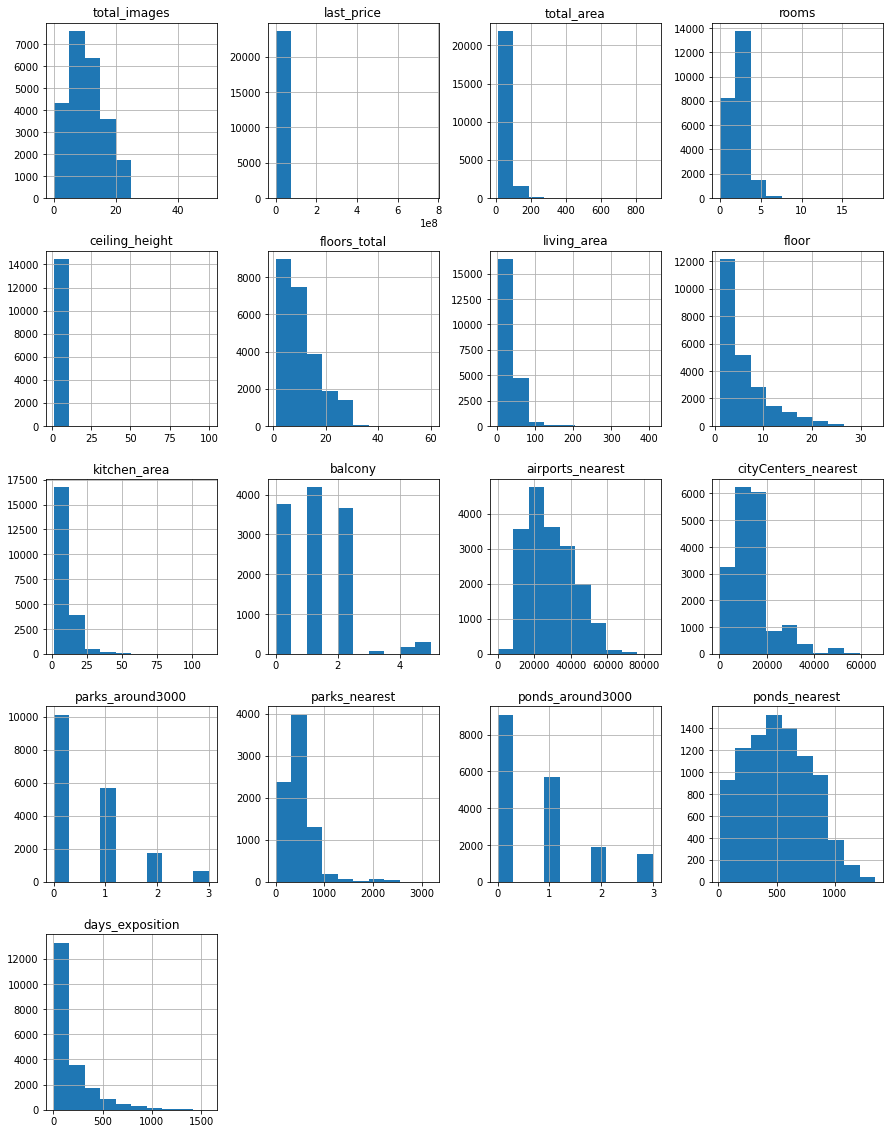

In [6]:
data.hist(figsize=(15, 20));

Гистограммы столбцов датафрейма дают больше информации о распределении данных, подтверждаяя вышесказанные предположения по:
- ceiling_height - все данные собраны в районе 3-4м, а 100м это какой-то выброс
- floors_total - данных после значения 40 практически нет, что тоже подтверждает предположение об ошибке в данных
- airports_nearest - требуется внимательно рассмотреть данные в столбце
- Также следует обратить внимание на следующие столбцы, т.к. почти все данные собраны в одном месте: lst_price, total_area, rooms, living_area, kitchen_area

## Предобработка данных

### Проверим на дубликаты в датафрейме

In [7]:
data.duplicated().sum()

0

### Заполнение пропусков в датафрейме

#### 1.Столбец 'is_appartment'

Заполним прорущенные значения в столбце 'is_apartment' значениями False - что означает, что это не апартаменты

In [8]:
data['is_apartment'].isna().sum()

20924

In [11]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [12]:
data['is_apartment'].fillna(False, inplace=True)

Проверим сколько пропущенных значений осталось после замены:

In [13]:
data['is_apartment'].isna().sum()

0

Ни одного, отлично!

#### 2.Столбец 'ceiling_height'

Посмотрим на столбец более внимательно и попробуем найти особенности. При этом будем опираться СНИПы. Согласно информации изложенной в них высота потолока не должна быть ниже
2.6м. По более новым стандартам она не должна быть ниже 2.7м

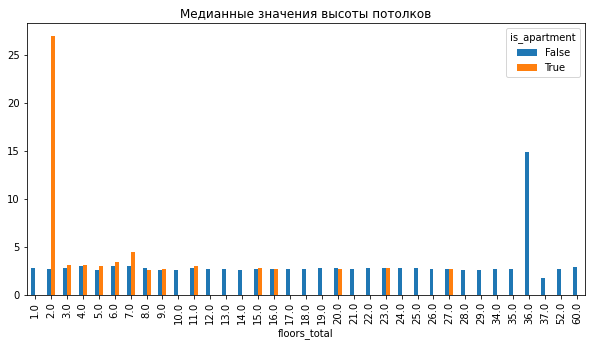

In [17]:
pd.pivot_table(data, values='ceiling_height', index='floors_total', 
columns='is_apartment',aggfunc='median').plot(kind='bar', 
figsize=(10,5), title='Медианные значения высоты потолков');

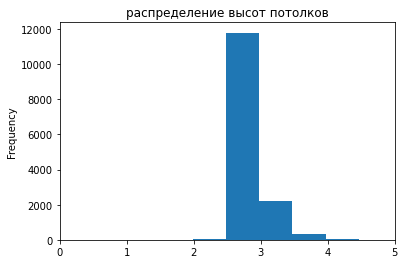

In [22]:
data['ceiling_height'].plot(kind='hist', bins=200, 
title='распределение высот потолков', xlim=(0,5));

Найдем медианную высоту потолков в апартаментах

In [25]:
apart_med = data[data['is_apartment'] == True]['ceiling_height'].median()
apart_med

3.0

Медианная высота потолков в апартаментах = 3м

In [26]:
data.loc[(data['ceiling_height'] > 3.0) & (data['is_apartment']==True),
'ceiling_height'] = apart_med

выберем апартаиенты с пропущенными данными высоты потлоков 

In [27]:
data[(data['is_apartment'] == True) & (data['ceiling_height'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
3816,4,4779000.0,53.1,2016-05-16T00:00:00,1,NaN,13.0,19.8,6,True,False,False,15.9,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
10867,1,56844500.0,177.9,2015-01-15T00:00:00,3,NaN,6.0,87.2,5,True,False,False,87.2,NaN,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
11492,1,46424072.0,92.4,2014-12-09T00:00:00,2,NaN,6.0,54.8,6,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1030.0
14603,12,13490000.0,100.6,2018-07-31T00:00:00,7,NaN,4.0,NaN,2,True,False,False,NaN,NaN,Санкт-Петербург,24309.0,3876.0,3.0,574.0,3.0,325.0,50.0


заполним пропуски медианным значением высоты потолков для апартаментов

In [28]:
data.loc[data['is_apartment'] == True,'ceiling_height'] = 
data.loc[data['is_apartment'] == True,'ceiling_height'] .fillna(apart_med) 

проверим кол-во пропусков для апартаментов

In [29]:
data[(data['is_apartment'] == True) & (data['ceiling_height'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


пропуски в апартаментах отсутсутствуют

посмотрим на высоту потолоков по этажам, для этого воспользуемся pivot_table с грппировкой данных по этажам и получением медианного значения высоты потолков

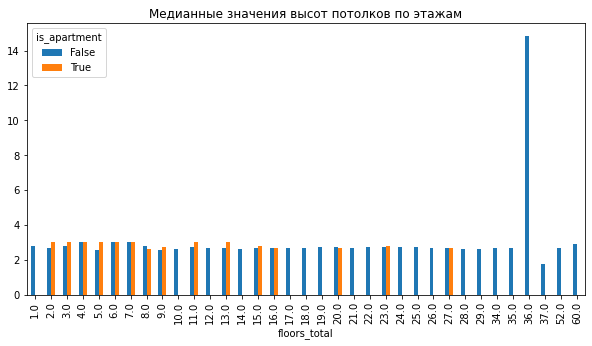

In [30]:
pd.pivot_table(data, values='ceiling_height', index='floors_total', 
columns='is_apartment', aggfunc='median').plot(kind='bar', figsize=(10,5),
 title='Медианные значения высот потолков по этажам');

получим медианную высоту в обычных квартирах (не апартаменты):

In [31]:
liv_med = data[data['is_apartment'] == False]['ceiling_height'].median()
liv_med

2.65

выберем данные не апартаменты и где высота потолков выше 2.7 и присвоим им значение медианны высоты потолков жилых помещений

In [32]:
data.loc[(data['ceiling_height'] > 2.7) & (data['is_apartment']==False),
'ceiling_height'] = liv_med

проверим кол-во пропущенных значений не в апартаментах

In [33]:
data[(data['is_apartment'] == False) & (data['ceiling_height'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,False,False,False,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,False,False,False,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


заполним пропущенные значения не в апартаментах медианным значением для жилых помещений:

In [34]:
data.loc[data['is_apartment'] == False,'ceiling_height'] = data.loc[
    data['is_apartment'] == False,'ceiling_height'] .fillna(liv_med) 

проверим, что пропущенные значения отсутствуют 

In [35]:
data[(data['is_apartment'] == True) & (data['ceiling_height'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


сгруппируем данные по этажам и посмотрим на среднюю высоту потоков:

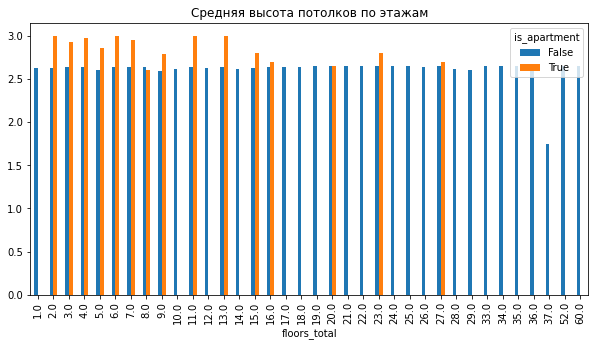

In [36]:
pd.pivot_table(data, values='ceiling_height', index='floors_total', 
columns='is_apartment').plot(kind='bar', figsize=(10,5),
 title='Средняя высота потолков по этажам');

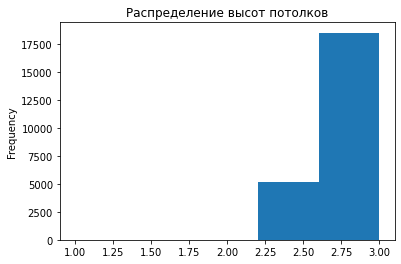

In [39]:
data['ceiling_height'].plot(kind='hist', bins=5,
 title='Распределение высот потолков');

In [40]:
data[(data['ceiling_height'] > 1.5) & (data['ceiling_height'] < 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [41]:
data.loc[(data['ceiling_height'] < 2.6) & (data['is_apartment']==False),
                                            'ceiling_height'] = liv_med

In [42]:
data[(data['ceiling_height'] > 1.5) & (data['ceiling_height'] < 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### 3.Столбец 'locality_name'

Выберем уникальные значения из стобца 'locality_name':

In [43]:
un_loc_name = data['locality_name'].unique()
len(un_loc_name)

365

Кол-во "уникальных" наименований 356, но среди них есть повторения - разное написание населенных пунктов. Исправим это:

Напишем функцию создания словаря, в котором ключами будут названия населенных пунктов без указания их типа, а значениями полное название населенного пункта (включая его тип):

In [44]:
def create_name_dict(un_loc_name):
    name_dict = {}
    for ind in un_loc_name:
        if type(ind) != str:
            continue
        lname = ind.split()
        if 'типа' in lname:
            s = ' '.join(lname[3:])
            name_dict[s] = 'посёлок городского типа ' + s
        elif 'коттеджный' in lname:
            s = ' '.join(lname[2:])
            name_dict[s] = 'коттеджный посёлок ' + s
        elif 'городской' in lname:
            s = ' '.join(lname[2:])
            name_dict[s] = 'городской посёлок ' + s 
        elif 'железнодорожной' in lname:
            s = ' '.join(lname[4:])
            name_dict[s] = 'посёлок при железнодорожной станции ' + s        
        elif 'посёлок' in lname or 'поселок' in lname:
            s = ' '.join(lname[1:])
            name_dict[s] = 'посёлок ' + s
        elif 'деревня' in lname:
            s = ' '.join(lname[1:])
            name_dict[s] = 'деревня ' + s
        elif 'село' == lname[0]:
            s = ' '.join(lname[1:])
            name_dict[s] = 'село ' + s
        elif 'некоммерческое' in lname:
            s = ' '.join(lname[3:])
            name_dict[s] = 'садоводческое некоммерческое товарищество ' + s
        elif 'садовое' in lname:
            s = ' '.join(lname[2:])
            name_dict[s] = 'садовое товарищество ' + s
        else:
            s = ' '.join(lname)
            name_dict[s] = s
    return name_dict
           

    
unique_locality_name = create_name_dict(un_loc_name)


Напишем функцию, которая выделяет название населенного пункта из полного названия:

In [45]:
def name_to_check(name):
    if type(name) != str:
        return None
    lname = name.split()
    if 'типа' in lname:
        return ' '.join(lname[3:])
    elif 'коттеджный' in lname:
        return ' '.join(lname[2:])
    elif 'городской' in lname:
        return ' '.join(lname[2:])
    elif 'железнодорожной' in lname:
        return ' '.join(lname[4:])
    elif 'посёлок' in lname or 'поселок' in lname:
        return ' '.join(lname[1:])
    elif 'деревня' in lname:
        return ' '.join(lname[1:])
    elif 'село' == lname[0]:
        return ' '.join(lname[1:])
    elif 'некоммерческое' in lname:
        return' '.join(lname[3:])
    elif 'садовое' in lname:
       return ' '.join(lname[2:])
    else:
       return ' '.join(lname)
    

при помощи двух выше написанных функций заменим все названия в столбце 'locality_name' на новые, приведенные к единому виду:

In [46]:
data['locality_name'] = data['locality_name'].apply(lambda x: 
            unique_locality_name.get(name_to_check(x), None))

Посмотрим на пропущенные данные в столбце 'locality_name':

In [47]:
data['locality_name'].isna().sum()

49

определить населенный пугкт можно зная расстояние до центра города и до аэропорта. построим таблицу с диапазоном энечений (мин, макс) для расстояния до центра города и до аэропорта: 

In [48]:
pv_lm = pd.pivot_table(data, index='locality_name', values=[
    'airports_nearest',
    'cityCenters_nearest'],
    aggfunc={'airports_nearest':['min','max'],
    'cityCenters_nearest':['min','max']})
pv_lm

airports_nearest          cityCenters_nearest         
                                     max      min                 max      min
locality_name                                                                 
Зеленогорск                      81607.0  70016.0             62706.0  51115.0
Колпино                          31691.0  23649.0             37477.0  29436.0
Красное Село                     38367.0  23892.0             41792.0  27317.0
Кронштадт                        69785.0  64931.0             51511.0  46657.0
Ломоносов                        56896.0  46502.0             61495.0  36816.0
Мурино                           51553.0  51553.0             21888.0  21888.0
Павловск                         24291.0  19380.0             36445.0  31533.0
Петергоф                         46535.0  34626.0             49574.0  29815.0
Пушкин                           21055.0  12157.0             35610.0  24311.0
Санкт-Петербург                  54784.0      0.0             29493.0    181.0
Сестрорецк                       61872.0  50031.0             42971.0  31130.0
деревня Щеглово                  61908.0  61908.0             34085.0  34085.0
посёлок Александровская          13012.0  12781.0             27584.0  27352.0
посёлок Белоостров               57769.0  57769.0             38868.0  38868.0
посёлок Левашово                 52693.0  52693.0             25727.0  25727.0
посёлок Лисий Нос                55930.0  54068.0             28246.0  26368.0
посёлок Металлострой             26729.0  24629.0             29217.0  26696.0
посёлок Молодёжное               84869.0  83758.0             65968.0  64857.0
посёлок Парголово                61748.0  44346.0             24415.0  17994.0
посёлок Песочный                 56095.0  52504.0             27835.0  25867.0
посёлок Петро-Славянка           20605.0  20605.0             27165.0  27165.0
посёлок Понтонный                32141.0  28997.0             33853.0  30709.0
посёлок Репино                   64127.0  61451.0             45226.0  42550.0
посёлок Сапёрный                 34180.0  34110.0             35892.0  35822.0
посёлок Стрельна                 28945.0  26770.0             24134.0  21813.0
посёлок Усть-Ижора               26521.0  26500.0             28233.0  28212.0
посёлок Шушары                   26293.0   9294.0             32079.0  17012.0

Напишем функцию, которая проверяет попадает ли расстояние в указанный диапазон значений для расстояний центра города и для аэропорта и если расстояне попадает, то возвращается название населенного пункта:

In [49]:
def find_location(pv_lm, airport_n, cCenter_n):
    if type(airport_n) != float or type(cCenter_n) != float:
        return None 
    if all([airport_n, cCenter_n]) != True:
        return None
    for index, row in pv_lm.iterrows():
        try:
            r1 = float(row['airports_nearest']['max'])
            r2 = float(row['airports_nearest']['min'])
            r3 = float(row['cityCenters_nearest']['max'])
            r4 = float(row['cityCenters_nearest']['min'])
        except:
            continue
        if airport_n < r1 and airport_n > r2 and cCenter_n < r3 and cCenter_n > r4:
                return row.name
    return None

применим написанную выше функцию для каждой строчки где нет значения населенного пункта:

In [50]:
data.loc[data['locality_name'].isna(), 'locality_name'] = data[
    data['locality_name'].isna()].apply(    lambda row: find_location(
        pv_lm, row['airports_nearest'], row['cityCenters_nearest']), axis=1)
    

после работы функции у нас остались еще не заполненные данные:

In [51]:
data[data['locality_name'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,False,False,False,18.6,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,2.65,4.0,25.8,3,False,False,False,NaN,1.0,None,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.65,9.0,NaN,2,False,False,False,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.65,5.0,47.3,2,False,False,False,8.3,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,False,False,False,10.0,1.0,None,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.65,9.0,30.5,2,False,False,False,29.2,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.65,9.0,36.6,2,False,False,False,29.7,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,False,False,False,10.0,1.0,None,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Посмотрим как можно заполнить оставшиеся пробелы в столбце 'locality_name'. Можно сгруппировать датафрейм по городам и посмотреть среднюю стоимость жилья:

In [52]:
pv_lp = pd.pivot_table(data, index=['locality_name', 'rooms','floor'], 
                                values='last_price', aggfunc='median')

Напишем функцию, которая по стоимости жилья, этажу и кол-ву комнат находит соответствующий населенный пункт:

In [53]:
def find_location_pfr(pv_lp, lastprice, floor, rooms):
    city_dict = {}
    min_price_diff = 550000
    for city in pv_lp.iterrows():
        pr_dif = abs(lastprice - city[1][0])
        if city[0][1] == rooms and city[0][2] == floor and pr_dif < min_price_diff:
            city_dict[city[0][0]] = pr_dif
            min_price_diff = pr_dif
    sorted_tuples = sorted(city_dict.items(), key=lambda item: item[1])
    
    try:
        return sorted_tuples[0][0]
    except:
        return 'нет подходящих нас.пунктов'
                

применяем функцию к каждой строчке с пропущеннвми данными о населенном пунке:

In [54]:
data.loc[data['locality_name'].isna(),'locality_name'] = data[
    data['locality_name'].isna()].apply(lambda row: find_location_pfr(
        pv_lp, row['last_price'], row['floor'], row['rooms']), axis=1)

проверяем наличие пропусков

In [55]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


всего уникальных населенных пунктов где прелагаются квартиры на продажу:

In [56]:
len(data['locality_name'].unique())

308

В столбце 'locality_name' пропуски отсутствуют

#### 4.Столбец 'floors_total'

Самое высокое жилое здание в СПб и ЛО имеет 42 этажа(данные Wikipedia). В связи с этим, все что выше данной цифры, нужно рассматривать как ошибочные значения, которые нужно исправить. 

In [57]:
data[data['floors_total'] > 42]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.65,60.0,27.4,4,False,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Посмотрим медианные значения по городам:

так как ошибочные данные находятся только в двух городах: Санкт-Петербург и Кронштадт. Создадим отдельный датафрейм для анализа медианы только в этих городах

In [58]:
data_spb_kr = data[data['locality_name'].isin(['Кронштадт', 'Санкт-Петербург'])]

сгруппируем данные по названию населенного пункта и найдем медианное значение высоты зданий

In [59]:
pd.pivot_table(data_spb_kr, index='locality_name', values='floors_total', aggfunc='median')

,floors_total
locality_name,
Кронштадт,5.0
Санкт-Петербург,9.0


Вслучае с Кронштадтом медианная высота зданий 5, а этаж кравртиры 4, заменяем значение 60 на 5, в случае с Санкт-Петербург этаж выставленной на продажу квартиры выше медианного значения и мы заменим ошибочное значение 52 на значение этажа квартиры 18:

In [46]:
data.loc[2253, 'floors_total'] = 5
data.loc[16731	, 'floors_total'] = 18

найдем кол-во пропущенных значений этажности домов:

In [60]:
data['floors_total'].isna().sum()

86

In [61]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.65,NaN,NaN,3,False,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,False,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,False,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Для заполнения пропущенных значений сгруппируем пропущенные данные по названию населенного пункта и найдем иедианное значение высоты зданий для каждого города:

In [62]:
pv_ft = pd.pivot_table(data, index='locality_name', values='floors_total',
                                                         aggfunc='median')

функция, которая возвращает медианное значение для указанного города:

In [63]:
def find_total_floors(pvt, city):
    for r in pvt.iterrows():
        if r[0] == city:
            return r[1][0]
    

применим выше написанную функцию для каждой строчки с пропущенными данными по высоте зданий

In [64]:
data.loc[data['floors_total'].isna(),'floors_total'] = (
    data[data['floors_total'].isna()].apply(lambda row: row['floor'] 
    if find_total_floors(pv_ft, row['locality_name']) < row['floor'] 
    else find_total_floors(pv_ft, row['locality_name']) , axis=1)
)

In [65]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


проусков данных в столбце 'floors_total' нет

Построим гистограмму распределения высоты зданий в датафрейме:

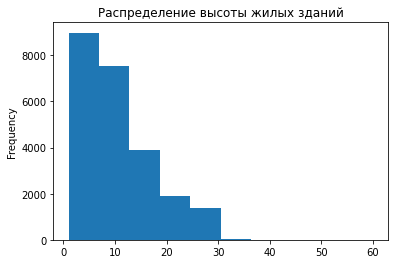

In [66]:
data['floors_total'].plot(kind='hist', title='Распределение высоты жилых зданий');

никаких странностей нет

#### 5.Столбец 'living_area'

Проверим пропущенные значения в столбце жилая площадь:

In [67]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.65,5.0,NaN,1,False,False,False,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.65,10.0,NaN,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,False,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


сгруппируем данные по городам и найдем медианное значение жтлой площади для каждого города:

In [68]:
pv_la = pd.pivot_table(data, index=['locality_name'], values='living_area',
                                             aggfunc='median').reset_index()
pv_la

,locality_name,living_area
0,Бокситогорск,29.50
1,Волосово,29.80
2,Волхов,30.30
3,Всеволожск,30.00
4,Выборг,30.00
...,...,...
287,село Путилово,29.30
288,село Рождествено,29.70
289,село Русско-Высоцкое,24.35
290,село Старая Ладога,15.80


Напишем функцию, которая по городу выдает медианное значение для него:

In [69]:
def find_living_area(pvt, city):
    la = pvt[(pvt['locality_name'] == city)]['living_area']
    if len(la) == 0:
        return np.NaN
    else:
        return la.values[0]

Применим выше написанную функцию  каждой строке с пропуском данных по жилой площади:

In [70]:
data.loc[data['living_area'].isna(),'living_area'] = (
data[data['living_area'].isna()].apply(lambda row: 
                find_living_area(pv_la, row['locality_name'],), axis=1)
)

In [58]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
986,10,1950000.0,62.0,2015-02-19T00:00:00,3,2.65,5.0,NaN,5,False,False,False,NaN,NaN,посёлок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.0,2016-11-28T00:00:00,1,2.65,3.0,NaN,3,False,False,False,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,2.65,18.0,NaN,4,False,True,False,NaN,NaN,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3334,10,1100000.0,41.0,2019-04-05T00:00:00,2,2.65,2.0,NaN,2,False,False,False,7.2,NaN,деревня Пчева,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4982,5,3381777.0,65.6,2017-12-09T00:00:00,2,2.65,17.0,NaN,17,False,False,False,NaN,NaN,деревня Лаврики,NaN,NaN,NaN,NaN,NaN,NaN,45.0
6987,7,4200000.0,43.3,2018-11-18T00:00:00,2,2.65,5.0,NaN,2,False,False,False,NaN,NaN,посёлок Левашово,52693.0,25727.0,0.0,NaN,0.0,NaN,61.0
7399,3,11000000.0,230.0,2018-03-01T00:00:00,5,2.65,2.0,NaN,2,False,False,False,NaN,NaN,деревня Хязельки,NaN,NaN,NaN,NaN,NaN,NaN,419.0
9140,12,1800000.0,35.0,2017-12-11T00:00:00,1,2.65,5.0,NaN,3,False,False,False,NaN,NaN,деревня Тарасово,NaN,NaN,NaN,NaN,NaN,NaN,43.0
15629,18,900000.0,60.0,2018-06-27T00:00:00,3,2.65,3.0,NaN,1,False,False,False,NaN,NaN,посёлок станции Лужайка,NaN,NaN,NaN,NaN,NaN,NaN,57.0
16030,0,1700000.0,62.0,2018-03-30T00:00:00,3,2.65,5.0,NaN,5,False,False,False,NaN,NaN,посёлок Красносельское,NaN,NaN,NaN,NaN,NaN,NaN,45.0


По данным приведенным выше значения в столбце 'living_area' заполнить не просто (скорее всего данные по каждому населенному пункту представлены в единственном экземпляре - ссылаются сами на себя). Заполним эти пропуски медианными значениями по всему датафрейму, с группировкой по кол-ву комнат: 

In [71]:
pvt_r_la = pd.pivot_table(data, index='rooms', values='living_area',
                                     aggfunc='median').reset_index()

функция поиска медианного значения жилой площади по кол-ву комнат в квартире:

In [72]:
def find_living_area2(pvt, rooms):
    la = pvt[(pvt['rooms'] == rooms)]['living_area']
    if len(la) == 0:
        return np.NaN
    else:
        return la.values[0]

применим данную функцию к строчкам с пропущенными данными и заполним пропуски медианой:

In [73]:
data.loc[data['living_area'].isna(),'living_area'] = (
data[data['living_area'].isna()].apply(lambda row: 
            find_living_area2(pvt_r_la, row['rooms'],), axis=1)
)

In [74]:
data['living_area'].isna().sum()

0

пропуски отсутствуют

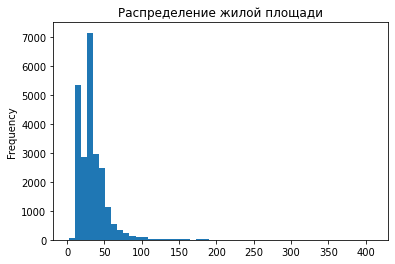

In [106]:
data['living_area'].plot(kind='hist', bins=50, title='Распределение жилой площади');

ниаких выбросов в столбце 'living_area' нет

#### 6.Столбец 'kitchen_area'

найдем пропуски данных в столбце

In [78]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,31.3,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,28.7,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.65,5.0,28.2,1,False,False,False,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,31.3,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,31.3,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.65,18.0,19.6,10,False,False,False,NaN,NaN,село Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.65,10.0,31.3,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.65,9.0,31.0,2,False,False,False,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9.0,30.0,4,False,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


посмотри на медианную площадь кухни по городам:

In [79]:
pv_ka = pd.pivot_table(data, index=['locality_name'], values='kitchen_area', 
                                            aggfunc='median').reset_index()
pv_ka

,locality_name,kitchen_area
0,Бокситогорск,6.00
1,Волосово,8.30
2,Волхов,6.80
3,Всеволожск,10.00
4,Выборг,8.05
...,...,...
285,село Путилово,7.85
286,село Рождествено,8.15
287,село Русско-Высоцкое,10.70
288,село Старая Ладога,6.00


функция находит медианную площадь кухни по городу:

In [80]:
def find_kitchen_area(pvt, city):
    la = pvt[(pvt['locality_name'] == city)]['kitchen_area']
    if len(la) == 0:
        return np.NaN
    else:
        return la.values[0]

Применим функцию к каждой строке с пропуском данных в столбце 'kitchen_area'

In [81]:
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = (
data[data['kitchen_area'].isna()].apply(lambda row: 
        find_kitchen_area(pv_ka, row['locality_name'],), axis=1)
)

In [82]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,2.65,5.0,44.0,5,False,False,False,NaN,NaN,посёлок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,2.65,3.0,17.9,3,False,False,False,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,2.65,4.0,10.5,3,False,False,True,NaN,1.0,посёлок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2409,4,1980000.0,27.00,2018-03-23T00:00:00,0,2.65,18.0,18.0,4,False,True,False,NaN,NaN,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
4982,5,3381777.0,65.60,2017-12-09T00:00:00,2,2.65,17.0,30.6,17,False,False,False,NaN,NaN,деревня Лаврики,NaN,NaN,NaN,NaN,NaN,NaN,45.0
6987,7,4200000.0,43.30,2018-11-18T00:00:00,2,2.65,5.0,30.6,2,False,False,False,NaN,NaN,посёлок Левашово,52693.0,25727.0,0.0,NaN,0.0,NaN,61.0
7399,3,11000000.0,230.00,2018-03-01T00:00:00,5,2.65,2.0,89.5,2,False,False,False,NaN,NaN,деревня Хязельки,NaN,NaN,NaN,NaN,NaN,NaN,419.0
9140,12,1800000.0,35.00,2017-12-11T00:00:00,1,2.65,5.0,17.9,3,False,False,False,NaN,NaN,деревня Тарасово,NaN,NaN,NaN,NaN,NaN,NaN,43.0
12821,15,4650000.0,72.00,2017-11-22T00:00:00,1,2.65,2.0,52.0,2,False,False,False,NaN,1.0,коттеджный посёлок Счастье,NaN,NaN,NaN,NaN,NaN,NaN,7.0
15629,18,900000.0,60.00,2018-06-27T00:00:00,3,2.65,3.0,44.0,1,False,False,False,NaN,NaN,посёлок станции Лужайка,NaN,NaN,NaN,NaN,NaN,NaN,57.0


По данным приведенным выше, значения в столбце 'kitchen_area' заполнить не просто (скорее всего данные по каждому населенному пункту представлены в единственном экземпляре - ссылаются сами на себя). Заполним эти пропуски медианными значениями по всему датафрейму, с группировкой по кол-ву комнат: 

сгруппируем данные по кол-ву комнат в квартирет и надем для них медианную площадь кухни:

In [83]:
pvt_r_ka = pd.pivot_table(data, index='rooms', values='kitchen_area',
                                         aggfunc='median').reset_index()

функция поиска площади кухни по кол-ву комнат:

In [84]:
def find_kitchen_area2(pvt, rooms):
    la = pvt[(pvt['rooms'] == rooms)]['kitchen_area']
    if len(la) == 0:
        return np.NaN
    else:
        return la.values[0]

Применим функцию к каждой строке с пропущенными данными в столбце 'kitchen_area'

In [85]:
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = (
data[data['kitchen_area'].isna()].apply(lambda row: 
        find_kitchen_area2(pvt_r_ka, row['rooms'],), axis=1)
)

In [86]:
data['living_area'].isna().sum()

0

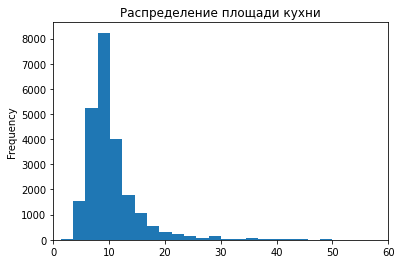

In [88]:
data['kitchen_area'].plot(kind='hist', xlim=(0, 60), 
                    bins=50,title='Распределение площади кухни');

Данные в столбце 'kitchen_area' заполнены, выбросов нет

#### 7. Столбец 'rooms'

проверим стобец с кол-вом комнат в квартире на пропуски

In [89]:
data['rooms'].isna().sum()

0

постороим гистограмму распределения кол-ва комнат

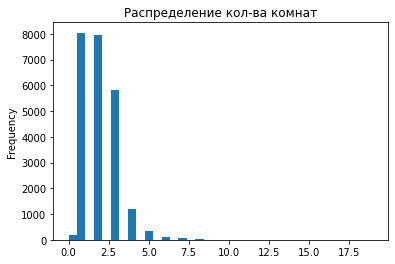

In [93]:
data['rooms'].plot(kind='hist', bins=36, title='Распределение кол-ва комнат');

Есть странные данные где кол-во комнат равно 0, этого быть не может.

In [94]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,10.385,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,False,True,10.540,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,9.900,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,False,True,11.000,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,28.20,7,False,True,False,10.800,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,True,False,9.900,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,False,True,10.385,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,31.30,8,False,True,False,9.900,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,False,True,8.250,2.0,село Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


создадим датафрейм с информацией по городам, размерам общей, жилой площади и площади кухни для квартир с кол-вом комнат 0:

In [95]:
data[data['rooms'] == 0].pivot_table(index='locality_name', 
        values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')

,kitchen_area,living_area,total_area
locality_name,,,
Всеволожск,10.000,19.40,27.000
Кудрово,10.540,17.40,25.000
Мурино,10.385,16.85,24.575
Отрадное,7.800,18.80,23.800
Санкт-Петербург,9.900,19.00,27.205
Сертолово,9.300,18.00,24.000
Тосно,8.500,30.00,31.000
городской посёлок Новоселье,11.000,16.72,26.080
городской посёлок Янино-1,10.400,14.00,26.000


In [96]:
data[data['rooms'] == 0]['total_area'].median()

26.05

медианная общая площадь строк с кол-вом комнат равно 0 составляет 26 кв.м

In [97]:
data[data['rooms'] != 0].pivot_table(index=['rooms'], 
        values=['total_area', 'living_area', 'kitchen_area'], aggfunc='median')

,kitchen_area,living_area,total_area
rooms,,,
1,9.50,17.90,36.56
2,9.00,30.60,53.00
3,9.90,44.00,73.00
4,10.50,61.60,99.30
5,14.40,89.50,146.45
6,18.70,122.00,184.30
7,18.00,142.00,214.00
8,23.10,161.00,235.70
9,13.75,169.90,300.95


исходя из данных таблицы выше мы видим, что 26 кв.м. это размер 1 комнатной квартиры, следовательно мы можем заменить занчение 0 в столбце 'rooms'  на значение 1:

In [98]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

#### 8. Столбец 'balcony'

посмотрим на данные в столбце

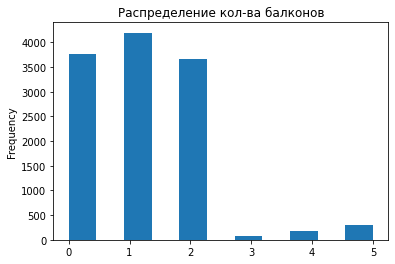

In [100]:
data['balcony'].plot(kind='hist', bins=11, title='Распределение кол-ва балконов');

Посмотрим на данные где значение балконов больше количества комнат + кухня:

In [107]:
data[data['balcony'] > (data['rooms'] + 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
116,18,10999000.0,97.20,2017-11-13T00:00:00,3,2.65,16.0,31.3,16,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
250,13,3200000.0,51.70,2019-01-22T00:00:00,2,2.65,16.0,29.2,5,False,False,False,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
263,12,39900000.0,140.60,2016-11-19T00:00:00,2,2.65,8.0,39.8,7,False,False,False,49.2,4.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN
267,2,14700000.0,120.00,2018-09-07T00:00:00,3,2.65,20.0,63.0,18,False,False,False,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21T00:00:00,1,2.70,16.0,28.0,8,False,False,False,11.0,5.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16T00:00:00,2,2.65,17.0,31.0,16,False,False,False,5.0,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22T00:00:00,2,2.65,20.0,29.4,16,False,False,False,9.6,4.0,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.65,9.0,39.7,2,False,False,False,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


In [108]:
data[(data['rooms'] + 1) < data['balcony']].pivot_table(index='rooms', 
                                    values='balcony', aggfunc='median')

,balcony
rooms,
1,5.0
2,5.0
3,5.0


заменим некорректные данные на более приемлемые (кол-во комнат + 1)

In [109]:
data.loc[data['rooms'] + 1 < data['balcony'], 'balcony'] = data['rooms'] + 1

In [110]:
data[data['rooms'] + 1 < data['balcony']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


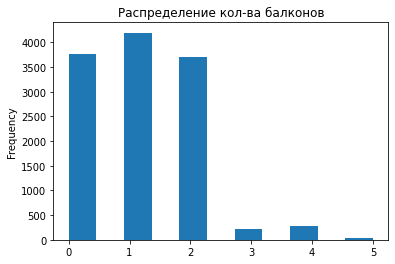

In [111]:
data['balcony'].plot(kind='hist', bins=11, title='Распределение кол-ва балконов');

Проверим пропущенные значения в столбце:

In [112]:
data['balcony'].isna().sum()

11519

Достаточно логично заменить значения NaN в столбце на значение 0. Так и сделаем:

In [113]:
data['balcony'] = data['balcony'].fillna(0)

In [114]:
data['balcony'].isna().sum()

0

Пропущенные значения отстуствуют

#### 9. Столбец 'parks_around3000'

Посмотрим на распределение данных

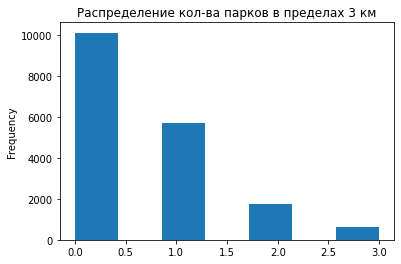

In [116]:
data['parks_around3000'].plot(kind='hist', bins=7, 
            title='Распределение кол-ва парков в пределах 3 км');

Прверим столбец на пропущенные данные

In [117]:
data['parks_around3000'].isna().sum()

5518

Логично считать, если в столбце 'parks_around3000' стоит NaN,то рядом (в районе 3км) парков нет и мы можем заменить NaN на 0.    

In [118]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [119]:
data['parks_around3000'].isna().sum()

0

Пропуски отсутствуют

#### 10. Столбец 'ponds_around3000'

Посмотрим на распределение данных в столбце 'ponds_around3000'

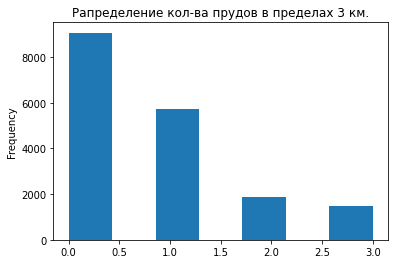

In [121]:
data['ponds_around3000'].plot(kind='hist', bins=7, 
title='Рапределение кол-ва прудов в пределах 3 км.');

Проверим на пропущенные значения:

In [122]:
data['ponds_around3000'].isna().sum()

5518

Логично считать, если в столбце 'ponds_around3000' стоит NaN,то рядом (в районе 3км) парков нет и мы можем заменить NaN на 0.    

In [123]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [124]:
data['ponds_around3000'].isna().sum()

0

Пропусков данных нет

#### 11. Столбец 'airports_nearest'

Проверим столбец на пропуск данных:

In [125]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.65,25.0,30.00,15,False,False,False,11.00,2.0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,28.70,2,False,False,False,8.35,0.0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.65,5.0,45.50,3,False,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,False,False,6.00,0.0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,False,False,8.15,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


Создадим датафрейм с данными по городам и медианным значением для них до ближайшего аэропорта:

In [126]:
pv_an = data[~data['airports_nearest'].isna()].pivot_table(
            index='locality_name', values='airports_nearest', 
                                aggfunc='median').reset_index()

Если населенного пункта нет, тогда нужно вернуть значение явно бросающееся в глаза. Выберем для этого значение 333333. Таким образом мы реши две цели: при преобразовании столбцов из float в int не возникнет проблем, и число будет говорить о нереальности данных

In [127]:
def find_airports_near(pvt, city):
    la = pvt[(pvt['locality_name'] == city)]['airports_nearest']
    if len(la) == 0:
        return 333333
    else:
        return la.values[0]

Применим функцию к каждой строке с пропуском данных:

In [128]:
data.loc[data['airports_nearest'].isna(),'airports_nearest'] = (
data[data['airports_nearest'].isna()].apply(lambda row: 
find_airports_near(pv_an, row['locality_name'],), axis=1)
)

In [129]:
data['airports_nearest'].isna().sum()

0

Пропусков данных нет

#### 12. Столбцы 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'

По такому же принципу произведем замену пропущенных значений в оставшихся столбцах: 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'

функция возвращает либо медианное значение до ближайшего центра города, ближайшего парка и ближайшего водоема, соответственно, либо возвращает 333333, если ничего не нашла:

In [130]:
def find_near(pvt, city, col):
    la = pvt[(pvt['locality_name'] == city)][col]
    if len(la) == 0:
        return 333333
    else:
        return la.values[0]

Применим функцию к каждой строке с прорущенными значениями в цикле по столбцам:

In [131]:
rest = ['cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for col in rest:
    pv = data[~data[col].isna()].pivot_table(index='locality_name', 
                        values=col, aggfunc='median').reset_index()
    data.loc[data[col].isna(), col] = (
    data[data[col].isna()].apply(lambda row: find_near(pv, 
                            row['locality_name'], col), axis=1)
    )

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Пропущенные данные в указанных столбцах отсутствуют

#### 13. Столбец days_exposition

Построим гистограмму распределения кол-ва дней с момента публикации: 

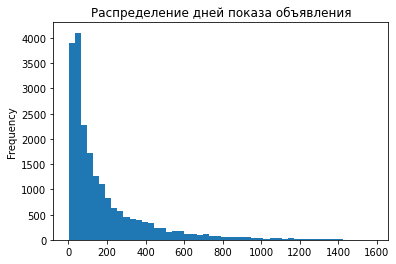

In [134]:
data['days_exposition'].plot(kind='hist', bins=50, title='Распределение дней показа объявления');

Проверим на пропущенные значения:

In [135]:
data['days_exposition'].isna().sum()

3181

In [136]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,31.3,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,503.0,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,31.3,3,False,False,False,9.90,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,460.0,0.0,503.0,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,460.0,0.0,503.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,2.65,26.0,71.4,17,False,False,False,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,460.0,0.0,503.0,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.65,5.0,17.3,5,False,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,407.0,0.0,553.0,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,2.65,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,8.15,0.0,село Рождествено,333333.0,333333.0,0.0,333333.0,0.0,333333.0,NaN


 Преобразуем first_day_exposition в тип datetime, как видно из самого формата данных в столбце.
 Время нас не интересует и мы его отбрасываем при преобразовании

In [137]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                                         format='%Y-%m-%d')


последняя дата публикации 3 мая 2019 года. Ее мы возмем за 0 значение и найдем кол-во дней как разницу между 03.05.2019 и перво  дато    публикации изаполним этим значением проаущенное

In [138]:
dd = pd.to_datetime('2019-05-03', format='%Y-%m-%d')
data.loc[data['days_exposition'].isna(),'days_exposition'] = (
data[data['days_exposition'].isna()].apply(lambda row: 
                (dd - row['first_day_exposition']).days, axis=1)
)

In [139]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


пропуски отсутствуют

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### 14. Преобразуем список столбцов из float64 в int64:

In [141]:
list_to_int = ['floors_total', 'balcony', 'parks_around3000', 
'ponds_around3000', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest' , 
'ponds_nearest', 'days_exposition']
for col in data.columns:
    if col in list_to_int:
        data[col] = data[col].astype('int64')

data.dtypes        

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 int64
cityCenters_nearest              int64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                  int64
dtype: object

In [142]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,57
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,333333,0,584,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,31.30,9,False,False,False,9.90,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000.0,100.00,2018-06-19,2,2.65,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,333333,333333,0,333333,0,333333,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,733,0,593,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,31.30,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,460,0,503,15
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,51553,21888,0,333333,0,133,189
9,18,5400000.0,61.00,2017-02-26,3,2.65,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,460,0,503,289


Преобразуем столбец 'last_price' в int, т.к копейки не используются: 

In [143]:
data['last_price'] = data['last_price'].astype('int64')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Данные в датафрейме без пропущенных значений, без выбросов, приведены к "своим" типам данных

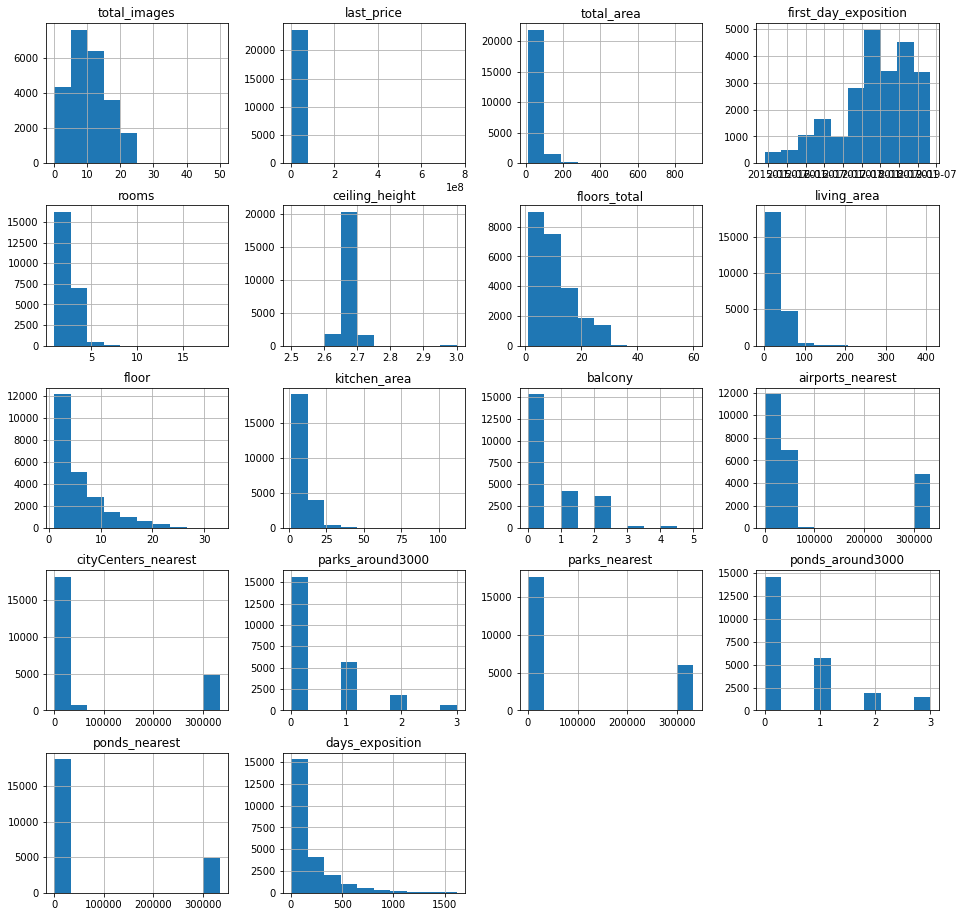

In [145]:
data.hist(figsize=(16,16));

## Добавление дополнительной информации

#### 1. Добавим столбец стоимость одного метра жилья:

In [146]:
data['price_per_m'] = (data['last_price'] / data['total_area']).astype(int)

#### 2. Добавим столбец с номером дня недели публикации объявления:

In [147]:
data['week_day_exp'] = data['first_day_exposition'].dt.weekday

In [148]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week_day_exp
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,57,120370,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,333333,0,584,81,82920,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3
3,0,64900000,159.00,2015-07-24,3,2.65,14,31.30,9,False,False,False,9.90,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4
4,2,10000000,100.00,2018-06-19,2,2.65,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,333333,333333,0,333333,0,333333,55,95065,0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,733,0,593,155,99195,3
7,5,7915000,71.60,2019-04-18,2,2.65,24,31.30,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,460,0,503,15,110544,3
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,51553,21888,0,333333,0,133,189,87454,2
9,18,5400000,61.00,2017-02-26,3,2.65,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,460,0,503,289,88524,6


#### 3. Добавим столбец с месяцем публикации объявления:

In [149]:
data['month_exp'] = data['first_day_exposition'].dt.month

#### 4. Добавим столбец с годом публикации объявления:

In [150]:
data['year_exp'] = data['first_day_exposition'].dt.year

#### 5. Добавим столбец с типом этажа ("первый", "последний", "другой"):

In [151]:
data['floor_type'] = data.apply(lambda row: 'первый' 
if row['floor'] == 1 else ('последний' if row['floor'] == row['floors_total'] 
else 'другой'), axis=1)

#### 6. Добавим столбец с расстоянием до центра СПб в км:

In [152]:
data['cityCenters_dist'] = (data['cityCenters_nearest'] / 1000).astype(int)

## Исследовательский анализ данных

Изучим харакеристики более подробно:

#### 1.Общая площадь

Построим гистограмму распределения общей площади квартиры:

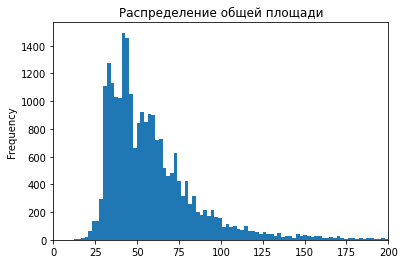

In [157]:
data['total_area'].plot(kind='hist', bins=401, xlim=(0,200), 
                        title='Распределение общей площади');

In [156]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Как видно из информации приведенной выше 75% всех объявлений предлагают картаиры до 70 кв.м. Остальные 25% содержать информацию о квартирах площадю от 70 до 900 кв.м. 

Рассмотрим 4 квартиль более подробно:

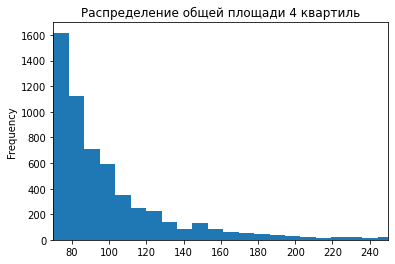

In [158]:
data[data['total_area'] > 70]['total_area'].plot(kind='hist', 
bins=100, xlim=(70, 250), title='Распределение общей площади 4 квартиль');

In [159]:
data[data['total_area'] > 70]['total_area'].describe()

count    5738.000000
mean      103.362682
std        48.845673
min        70.010000
25%        77.200000
50%        88.000000
75%       109.000000
max       900.000000
Name: total_area, dtype: float64

рассматривая значения 'total_area' больше 70 кв.м. мы видим, что здесь также 75% объявлений с площадью квартиры до 110 кв.м Таким образом почти 19% объявлений предлагают квартиры до 110 кв.м или если взять предыдущий результат, то получим 94% всех квартир с площадью до 110 кв.м и 6% квартиры большей площади до 900 кв.м.

#### 2.Жилая площадь

Построим гистограмму распределения жилой площади:

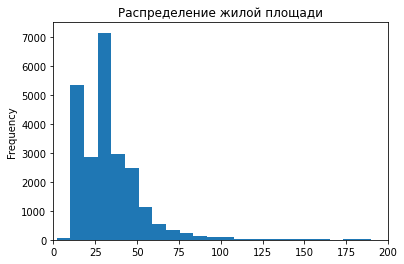

In [161]:
data['living_area'].plot(kind='hist', bins=50, xlim=(0, 200), 
                            title='Распределение жилой площади');

In [162]:
data['living_area'].describe()

count    23699.000000
mean        34.065036
std         21.223543
min          2.000000
25%         19.000000
50%         30.400000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах с жилой площадью до 42 кв.м. Рассмотрим промежуток в 25% от 75% до 100% более внимательно:

Рассмотрим 4 квартиль более подробно:

In [163]:
data[data['living_area'] > 41.1]['living_area'].describe()

count    5923.000000
mean       59.423118
std        27.552412
min        41.170000
25%        44.900000
50%        50.000000
75%        62.600000
max       409.700000
Name: living_area, dtype: float64

В результате исследования мы видим что также 75% из рассматриваемого интервала составляют объявления с жилой площадью до 63 кв.м. Таким образом, 94% всех объявлений прелагают квартиры с жилой площадью до 63 кв.м. Оставшиеся 6% - квартиры с жилой площадью от 63 до 410 кв.м.

#### 3.Площадь кухни

Построим гистограмму распределения площади кухни:

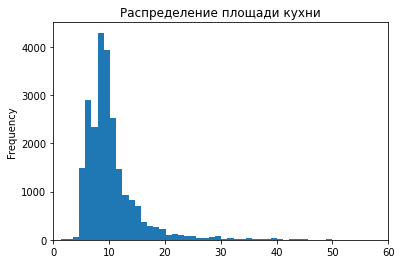

In [165]:
data['kitchen_area'].plot(kind='hist', bins=100, xlim=(0,60), 
                        title='Распределение площади кухни');

In [166]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.468443
std          5.635017
min          1.300000
25%          7.200000
50%          9.600000
75%         11.495000
max        112.000000
Name: kitchen_area, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах с площадью кухни до 11.5 кв.м. Рассмотрим промежуток в 25% от 75% до 100% более внимательно:

Рассмотрим 4 квартиль более подробно:

In [167]:
data[data['kitchen_area'] > 11.5]['kitchen_area'].describe()

count    5800.000000
mean       17.096464
std         7.830172
min        11.510000
25%        12.800000
50%        14.500000
75%        18.000000
max       112.000000
Name: kitchen_area, dtype: float64

В результате исследования мы видим что также 75% из рассматриваемого интервала составляют объявления с площадью кухни до 18 кв.м. Таким образом, 94% всех объявлений прелагают квартиры с площадью кухни до 18 кв.м. Оставшиеся 6% - квартиры с площадью от 18 до 112 кв.м.

#### 4.Цена объекта

Построим гистограмму распределения стоимости жилья:

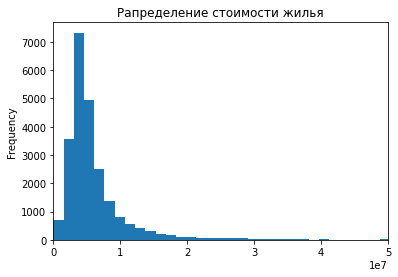

In [171]:
data['last_price'].plot(kind='hist', bins=500, xlim=(0,50000000),
                             title='Рапределение стоимости жилья');

In [172]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах со стоимостью до 42 6.8 млн рублей. Рассмотрим промежуток в 25% от 75% до 100% более внимательно:

In [173]:
data[data['last_price'] > 6800000]['last_price'].describe()

count    5.816000e+03
mean     1.422644e+07
std      1.997326e+07
min      6.812033e+06
25%      7.950000e+06
50%      9.800000e+06
75%      1.390000e+07
max      7.630000e+08
Name: last_price, dtype: float64

В результате исследования мы видим что также 75% из рассматриваемого интервала составляют объявления со стоимостью квартиры до 14 млн рублей. Таким образом, 94% всех объявлений прелагают квартиры со стоимостью до 14 млн. рублей. Оставшиеся 6% - квартиры со стоимостью от 14 млн до 763 млн.рублей.

#### 5.Кол-во комнат

Построим гистограмму распределения кол-ва комнат в квартирах:

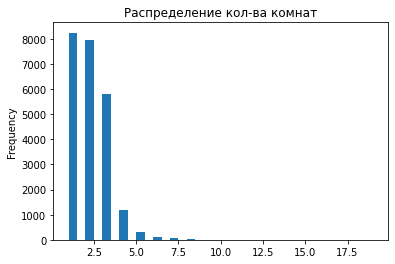

In [176]:
data['rooms'].plot(kind='hist', bins=36, 
            title='Распределение кол-ва комнат');

In [177]:
data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах с кол-вом комнат 3 и менее. Рассмотрим промежуток в 25% от 75% до 100% более внимательно:

In [178]:
data[data['rooms'] > 3]['rooms'].describe()

count    1701.000000
mean        4.528513
std         1.125602
min         4.000000
25%         4.000000
50%         4.000000
75%         5.000000
max        19.000000
Name: rooms, dtype: float64

В результате исследования мы видим что также 75% из рассматриваемого интервала составляют объявления с 5 комнатами и меньше. Таким образом, 94% всех объявлений прелагают квартиры с кол-вом комнат 5 и менее. Оставшиеся 6% - квартиры с кол-вом комнат более 5 и до 19 включительно.

#### 6.высота потолка

Построим гистограмму распределения высот потолков в квартирах:

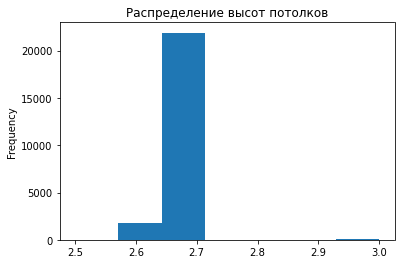

In [179]:
data['ceiling_height'].plot(kind='hist', bins= 7, 
                title='Распределение высот потолков');

In [180]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.650397
std          0.023024
min          2.500000
25%          2.650000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах с высотой потолка 2.65. При этом макимальное значение 3 метра. Рассмотрим 4 квартиль подробнее, узнаем сколько всего объявлений в этом диапазоне:

In [181]:
data.query('ceiling_height > 2.65')['ceiling_height'].count()

1694

В результате исследования мы видим что что 92.85% всех объявлений прелагают квартиры с высотой потолка до 2.65 м включительно. Оставшиеся 7.15% - квартиры с высотой потолка более 2.65м

#### 7. Этаж квартиры

Построим гистограмму распределения этажей, на которых располоагаются квартиры:

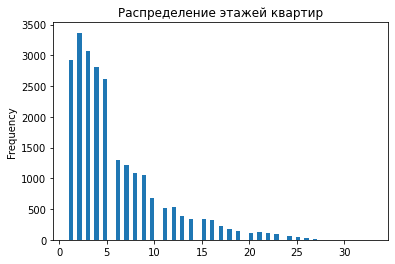

In [184]:
data['floor'].plot(kind='hist', bins=71, 
            title='Распределение этажей квартир');

In [185]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах расположенных до 9 этажа. Посмотрим на оставшиеся 25%

In [186]:
data[data['floor'] > 8]['floor'].describe()

count    5310.000000
mean       13.451977
std         4.276893
min         9.000000
25%        10.000000
50%        12.000000
75%        16.000000
max        33.000000
Name: floor, dtype: float64

В результате исследования мы видим что что 94% всех объявлений прелагают квартиры до 16 этажа включительно. Оставшиеся 6% - квартиры на этаже выше 16 и до 33 включительно

#### 8.Тип этажа (первый, другой последний)

Построим гистограмму распределения типа этажа:

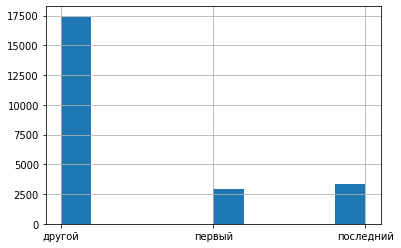

In [190]:
data['floor_type'].hist();

In [191]:
data['floor_type'].value_counts()

другой       17408
последний     3374
первый        2917
Name: floor_type, dtype: int64

Цифры приведенные выше показывают, что 73% объявлений содержат информацию о квартирах где этаж не является крайним. 14% составляют квартиры на последнем этаже в доме. 13% составляют квартиры на первом этаже.

#### 9. Кол-во этажей в доме

Построим гистограмму распределения высоты домов:

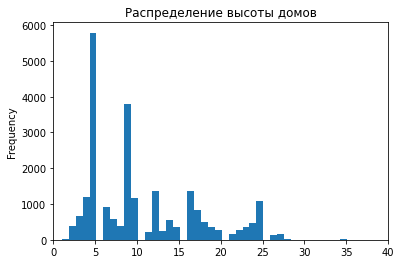

In [193]:
data['floors_total'].plot(kind='hist', bins=71, 
        title='Распределение высоты домов', xlim=(0,40));

In [194]:
data['floors_total'].describe()

count    23699.000000
mean        10.680155
std          6.592953
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах расположенных в домах с 16 этажами и менее. Посмотрим на оставшиеся 25%

In [195]:
data[data['floors_total'] > 16]['floors_total'].describe()

count    4654.000000
mean       21.670821
std         3.566256
min        17.000000
25%        18.000000
50%        22.000000
75%        25.000000
max        60.000000
Name: floors_total, dtype: float64

В результате исследования мы видим что что 94% всех объявлений прелагают квартиры в домах с 22 этажами и менее. Оставшиеся 6% - квартиры в домах выше 22 этаже и до 37 включительно

#### 10. Расстояние до центра города

Построим гистограмму распределения расстояний до центра города:

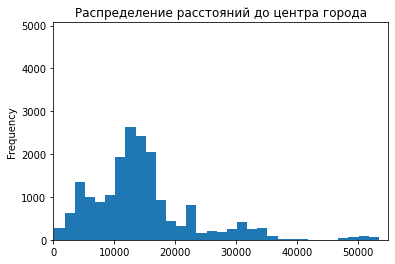

In [198]:
data['cityCenters_nearest'].plot(kind='hist', bins=200, 
    xlim=(0, 55000), title='Распределение расстояний до центра города');

In [199]:
data['cityCenters_nearest'].describe()

count     23699.000000
mean      79501.005612
std      128721.993078
min         181.000000
25%       10927.000000
50%       14951.000000
75%       31045.000000
max      333333.000000
Name: cityCenters_nearest, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах расположенных в пределах 31 км от центра города. Посмотрим на оставшиеся 25%

In [200]:
data[data['cityCenters_nearest'] > 31045]['cityCenters_nearest'].describe()

count      5925.000000
mean     278952.812658
std      114528.000331
min       31054.000000
25%      333333.000000
50%      333333.000000
75%      333333.000000
max      333333.000000
Name: cityCenters_nearest, dtype: float64

В результате исследования мы видим что что все объявления прелагают квартиры в пределах 31 км от центра города. Значение 333333 говорит о том, что данные отсутвуют и сделать заключение  о расстоянии до центра города по этим объявлениям не возможно.

#### 11. Расстояние до ближайшего аэропорта

Построим гистограмму распределения расстояний до ближайшего аэропорта:

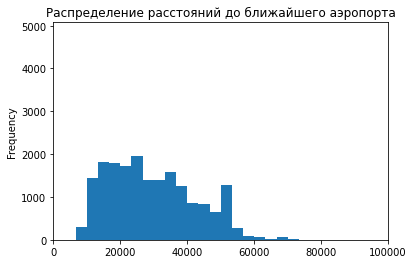

In [203]:
data['airports_nearest'].plot(kind='hist', bins=100, 
xlim=(0, 100000), title='Распределение расстояний до ближайшего аэропорта');

In [204]:
data['airports_nearest'].describe()

count     23699.000000
mean      91501.438457
std      122972.023345
min           0.000000
25%       21176.000000
50%       33338.000000
75%       51553.000000
max      333333.000000
Name: airports_nearest, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений содержат информацию о квартирах расположенных в пределах 51.5 км от ближайшего аэропорта. Посмотрим на оставшиеся 25%

In [205]:
data[data['airports_nearest'] > 51553]['airports_nearest'].describe()

count      5674.000000
mean     292411.222242
std       98203.947120
min       51563.000000
25%      333333.000000
50%      333333.000000
75%      333333.000000
max      333333.000000
Name: airports_nearest, dtype: float64

В результате исследования мы видим что что 75% объявлений прелагают квартиры в пределах 51.5 км от ближайшего аэропорта. Значение 333333 говорит о том, что данные отсутвуют и сделать заключение  о расстоянии до ближайшего аэропорта по этим объявлениям не возможно.

#### 12. Расстояние до ближайшего парка

Построим гистограмму распределения расстояний до ближайшего парка:

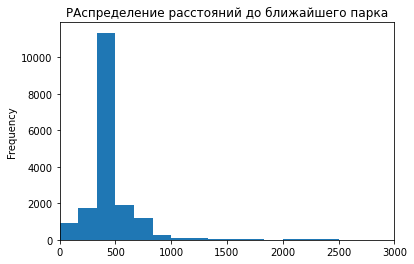

In [210]:
data['parks_nearest'].plot(kind='hist', bins=2000, 
xlim=(0,3000), title='РАспределение расстояний до ближайшего парка');

In [211]:
data['parks_nearest'].describe()

count     23699.000000
mean      84789.229503
std      144763.505468
min           1.000000
25%         460.000000
50%         460.000000
75%      333333.000000
max      333333.000000
Name: parks_nearest, dtype: float64

Цифры приведенные выше показывают, что 50% объявлений содержат информацию о квартирах расположенных в пределах 460 м от ближайшего парка. Посмотрим на оставшиеся 50%

In [212]:
data[data['parks_nearest'] > 460]['parks_nearest'].describe()

count     10270.000000
mean     195137.439922
std      163922.464201
min         461.000000
25%         677.250000
50%      333333.000000
75%      333333.000000
max      333333.000000
Name: parks_nearest, dtype: float64

В результате исследования мы видим что что 62.5% объявлений прелагают квартиры в пределах 677 м от ближайшего парка. Значение 333333 говорит о том, что данные отсутвуют и сделать заключение  о расстоянии до ближайшего паркка по этим объявлениям не возможно.

#### 13. День публикации

Построим гистограмму распределения дней недели публикации объявлений:

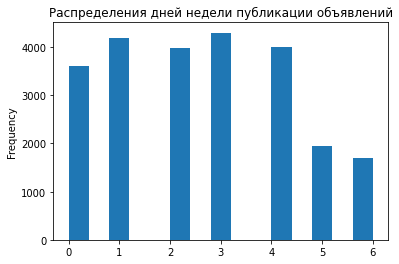

In [214]:
data['week_day_exp'].plot(kind='hist', bins=15, 
title='Распределения дней недели публикации объявлений');

In [215]:
data['week_day_exp'].describe()

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day_exp, dtype: float64

Цифры приведенные выше показывают, что 75% объявлений были опубликованиы в рабочие дни. Вторник и четверг наиболее активные дни публикаций из рабочих дней, причем четверг самый активный день недели для размещения новых объявлений. Менее всего объявлений публикуют в воскресенье.

#### 14. Месяц публикации

Построим гистограмму распределения месяцев публикации объявлений:

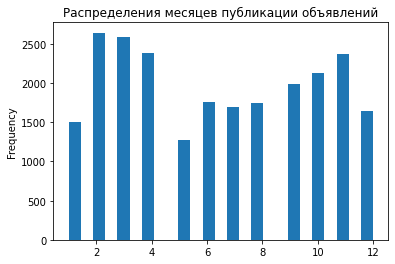

In [217]:
data['month_exp'].plot(kind='hist', bins=25, 
title='Распределения месяцев публикации объявлений');

Рассмотрим подробнее первую половину года:

In [218]:
data.query('month_exp < 7')['month_exp'].describe()

count    12140.000000
mean         3.376194
std          1.578256
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: month_exp, dtype: float64

Рассмотрим подробнее вторую половину года:

In [219]:
data.query('6 < month_exp')['month_exp'].describe()

count    11559.000000
mean         9.576001
std          1.639541
min          7.000000
25%          8.000000
50%         10.000000
75%         11.000000
max         12.000000
Name: month_exp, dtype: float64

Цифры и гистограмма приведенные выше показывают, что в первую половину года объявления публикуются более активно, чем во вторую. С пиком в первой половине года в феврале и последующим спадом к июню. Провал мая объясняется длинными выходными днями, в которые как мы видели ранее, объявления публикуются наименее активно. Низкая активность в июне, июле, августе также связана с отпусками. Во второй половине года происходит рост активности публикаций, с ежемесячным ростом до ноября (пик второй половины года) и резким падением до январких уровней в декабре (в январе длинные новогодние праздники, а в декабре люди заняты подготовкой к "Новому Году"

#### 15. Сроки продажи квартиры

Построим гистограмму распределения сроков продаж квартир:

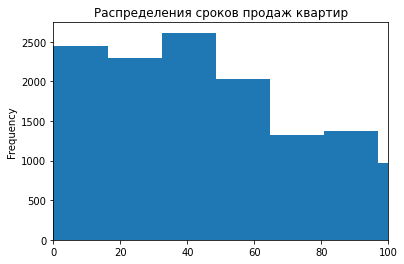

In [223]:
data['days_exposition'].plot(kind='hist', bins=100, 
xlim=(0,100), title='Распределения сроков продаж квартир');

In [167]:
data['days_exposition'].describe()

count    23699.000000
mean       185.821722
std        233.380877
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Цифры и гистограмма приведенные выше показывают, что по 50% объявлений квартиры были проданы в пределах 94 дней. в 75% объявлений срок продажи не превысил 237 дней.
При этом среднее значение, которое составляет 185 дней в два раза превышает медианное значение 94 дня. Это связано с большим макимальным значением 1618, которое и оказывает сильное влияние на среднее значение. чего не происходит в случае с медианой.

Все случаи попадающие в первый квартиль можно назвать быстрыми продажами. Все случаи попадающие в 4 квартиль - необычно долгими. 

#### 16. Влияние общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год) на стоимость жилья


Выведем для удобства необходимые столбцы в новый датафрейм:

In [252]:
cols = ['total_area', 'living_area', 'kitchen_area', 'rooms', 
'floor_type', 'week_day_exp', 'month_exp', 'year_exp', 'last_price']
data_a = data[cols]
data_a.head()

,total_area,living_area,kitchen_area,rooms,floor_type,week_day_exp,month_exp,year_exp,last_price
0,108.0,51.0,25.0,3,другой,3,3,2019,13000000
1,40.4,18.6,11.0,1,первый,1,12,2018,3350000
2,56.0,34.3,8.3,2,другой,3,8,2015,5196000
3,159.0,31.3,9.9,3,другой,4,7,2015,64900000
4,100.0,32.0,41.0,2,другой,1,6,2018,10000000


Посторим график зависимостей между всеми столбцами датафрейма:

Построим график зависмости стоимости жилья от общей площади:

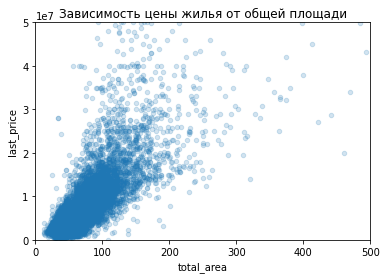

In [253]:
data_a.plot(kind='scatter', x='total_area', y='last_price', 
xlim=(0,500), ylim=(0,50000000), title='Зависимость цены жилья от общей площади',
 alpha=0.2);

Видна положительная корреляция между ценой жилья и общей площадью

Построим график зависмости стоимости жилья от жилой площади:

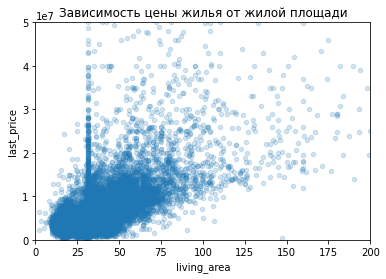

In [254]:
data_a.plot(kind='scatter', x='living_area', y='last_price', 
xlim=(0,200), ylim=(0,50000000), title='Зависимость цены жилья от жилой площади', 
alpha=0.2);

Видна положительная корреляция между ценой жилья и жилой площадью, при этом четко виден вертикальный столб в районе 30 кв.м.

Построим график зависмости стоимости жилья от площадью кухни:

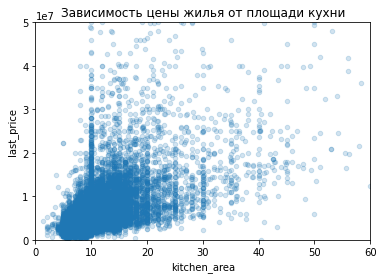

In [255]:
data_a.plot(kind='scatter', x='kitchen_area', y='last_price', 
xlim=(0,60), ylim=(0,50000000), title='Зависимость цены жилья от площади кухни', 
alpha=0.2);

Видна положительная корреляция между ценой жилья и общей площадью, здесь также видны вертикальные столбы на уровне 10, 15, 20, 25, 30, 35,40 кв. м. 

Построим график зависмости стоимости жилья от кол-ва комнат:

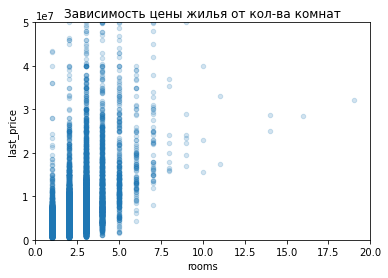

In [256]:
data_a.plot(kind='scatter', x='rooms', y='last_price', xlim=(0,20), 
ylim=(0,50000000), title='Зависимость цены жилья от кол-ва комнат', 
alpha=0.2);

На графике трудно определить зависимость, какая-то зависимость наблюдается, но видимо она слабая, далее расчитаем ее при помощи функции corr() 

Построим график зависмости стоимости жилья от типа этажа:

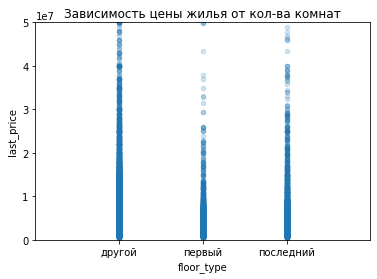

In [257]:
data_a.plot(kind='scatter', x='floor_type', y='last_price', xlim=(-1,3), 
ylim=(0,50000000), title='Зависимость цены жилья от кол-ва комнат', alpha=0.2);

На графике трудно определить зависимость, далее расчитаем ее при помощи функции corr() 

Построим график зависмости стоимости жилья от дня недели публикации:

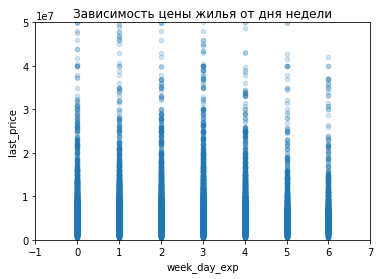

In [258]:
data_a.plot(kind='scatter', x='week_day_exp', y='last_price', xlim=(-1,7), 
ylim=(0,50000000), title='Зависимость цены жилья от дня недели', alpha=0.2);

На графике трудно определить зависимость, далее расчитаем ее при помощи функции corr() 

Построим график зависмости стоимости жилья от месяца публикации:

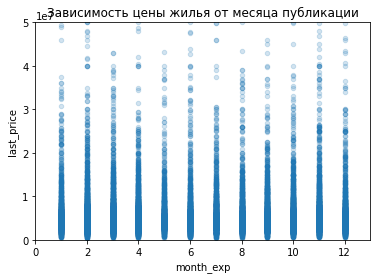

In [259]:
data_a.plot(kind='scatter', x='month_exp', y='last_price', xlim=(0,13), 
ylim=(0,50000000), title='Зависимость цены жилья от месяца публикации', alpha=0.2);

На графике трудно определить зависимость далее расчитаем ее при помощи функции corr() 

Построим график зависмости стоимости жилья от года публикации:

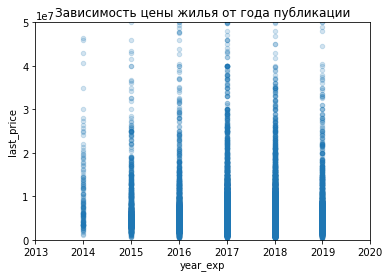

In [260]:
data_a.plot(kind='scatter', x='year_exp', y='last_price', xlim=(2013,2020), 
ylim=(0,50000000), title='Зависимость цены жилья от года публикации', alpha=0.2);

На графике трудно определить зависимость далее расчитаем ее при помощи функции corr() 

Расчитаем корреляцию:

In [261]:
data_a.corr()['last_price']

total_area      0.653675
living_area     0.541089
kitchen_area    0.442696
rooms           0.365209
week_day_exp    0.001550
month_exp       0.002779
year_exp       -0.043089
last_price      1.000000
Name: last_price, dtype: float64

На графике(нижняя строка на графике) и таблице под графиком видно, что существует сявязь между стоимостью жилья и общей площадью, жилой площадью, размером кухни и кол-вом комнат. Причем эта связь убывает с общей площадию до кол-ва комнат. Что говорит о снижении влияния на стоимость жилья указанных параметров соответственно. Если учесть, что общая площадь, жилая площадь, площадь кухни и кол-во комнат связаны друг с другом в той или иной пропорции, то не удивительно, что при наличии связи с одной характеристикой есть связь и со всеми другими.  
Связь между стоимостью жилья и днем, месяцем и годом публикации отсутвует. Это тоже соответствует здравому смыслу, т.к. не может быть никакой связи между датой публикации и стоимостью жилья.

Из анализа выше выпал столбец 'floor_type', т.к. он не числовой тип, а строковый (object). Функция corr() работает только с числовыми данными. Поэтому мы произведем замену строк на цифры, для этого воспользуемся функцией factorize() - кодирует строковые данные ввиде чисел. После перекодировки найдем корреляцию - связь между типом этажа(первый, другой, последний) и стоимостью жилья:

In [262]:
labels, categories = pd.factorize(data_a['floor_type'])
data_a['labels'] = labels
abs(data_a['last_price'].corr(data_a['labels']))

C:\Users\Sergey\AppData\Local\Temp\ipykernel_177988\1374450203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_a['labels'] = labels


0.0020211810077777745

Как видно из полученного значения связь между типом этажа и стоимостью жилья отсутствует. 

#### 17. Средняя стоимость квадратного  в 10 населённых пунктах с наибольшим числом объявлений

In [250]:
pd.pivot_table(data, index='locality_name', values=['price_per_m', 'last_price'],
                aggfunc={'last_price':'count', 'price_per_m':'median'}
                ).reset_index().sort_values(by=['last_price'], ascending=False).head(10
                ).sort_values('price_per_m', ascending=False).round({'price_per_m':0})

,locality_name,last_price,price_per_m
31,Санкт-Петербург,15761,104750.0
30,Пушкин,369,100000.0
17,Кудрово,472,95675.0
208,посёлок Парголово,327,91642.0
21,Мурино,590,86175.0
260,посёлок Шушары,440,76876.0
13,Колпино,338,74724.0
6,Гатчина,308,67746.0
3,Всеволожск,398,65789.0
4,Выборг,238,58232.0


Из данных в таблице видно, что Санкт-Петербург - город с самой высокой средней стоимостью квадратного метра, а Выборг - город с самой низкой средней стоимостью квадратного метра. 

#### 18. Санкт-Петербург. Средняя цена каждого километра.

Выделим из общего датафрейма новый, где будем рассматривать только объявления в Санкт-Петербурге и на базе нового датафрема сделаем сводную таблицу с группировкой по расстоянию от центра и значением, которое отражает среднююю стоимость квадратного метра:

In [263]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
pvt = pd.pivot_table(data_spb, index='cityCenters_nearest', 
values='price_per_m').reset_index()

Разобъем столбец с расстояниями(pvt['cityCenters_nearest']) на интервалы по 1 км и создадим новый столбец - ['km']:

In [264]:
pvt['km'] = pd.cut(pvt['cityCenters_nearest'], bins=np.linspace(0, 30000, 31))

Еще раз сгруппируем датафрейм pvt с помощью pivot_table, но уже по столбцу 'km' и вычислим среднюю стоимость жилья для каждого километра в направлении от центра

In [265]:
pvt_km = pd.pivot_table(pvt, index='km', values='price_per_m').reset_index()
pvt_km['km'] = pvt_km.apply(lambda row: row['km'].right, axis=1)

Округлим столбец со средней стоимостью (без копеек)

In [266]:
pvt_km.round({'price_per_m':0})

,km,price_per_m
0,1000.0,163519.0
1,2000.0,172765.0
2,3000.0,136130.0
3,4000.0,126272.0
4,5000.0,130586.0
5,6000.0,132997.0
6,7000.0,145727.0
7,8000.0,129952.0
8,9000.0,115094.0
9,10000.0,107247.0


Посмотрим, есть ли визуальная зависимость стоимости жилья от расстояния до центра: 

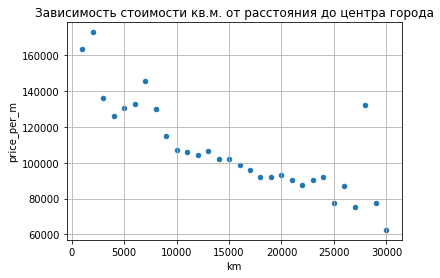

In [267]:
pvt_km.plot(x='km', y='price_per_m', kind='scatter', grid=True, 
title = 'Зависимость стоимости кв.м. от расстояния до центра города');

Мы видим визуальную отрицательную зависимость стоимости жилья от расстояния до центра города.

Проверим корреляцию с помощью функции corr():

In [178]:
pvt_km['km'].corr(pvt_km['price_per_m'])

-0.8299055825665438

Функция показывает сильную связь средней стоимости жилья и расстояния от центра города.
Таким образом, мы получили что чем дальше квартира расположена от центра, тем ее стоимость ниже и наоборот.


## Общий вывод

Во время работы с данными были произведены следующие действия:
1. проверены на наличие дубликатов
2. проверены на аномальные значения и при их наличии заменены на медианные значения для соответствующей группы данных
3. найдены и заменены все пропущенные значения либо на соответствующие логике, либо на медианные по соответствующей группе данных.
   Также часть данных была замена на 333333, значение, которое легко в дальнейшем заменить на корректные данны при появлении таковых и 
   которое легко исключить из анализа понимая, что это нереальные данные.
4. Проанализированы такие характеристики как:
   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - этаж квартиры;
   - тип этажа квартиры («первый», «последний», «другой»);
   - Общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего аэропорта;
   - расстояние до ближайшего парка;
   - день и месяц публикации объявления.
5. Проанализированы зависимости стоимости жилья от:
   - общей площади
   - жилой площади
   - площади кухни
   - кол-ва комнат в квартире
   -типа этажа (первый, другой, последний)
   -дня, месяца и года публикации объявления
6. Проанализирована взаимосвязь стоимости каждого километра от центра СПб и стоимостью жилья.

В ходе анализа предложенных данных были выявлены следующие моменты объявлений о продаже квартир:
1. Кол-во населенных пунктов где предлагаются квартиры на продажу составляет 308
2. Общая площадь квартир в 94% размещенных объявлений не превышает 110 кв.м.
3. Жилая площадь квартир в 94% не превышает 63 кв.м.
4. Площадь кухни квартир в 94% не превышает 18 кв.м.
5. Полная стоимость жилья в 94% не превышает 14 млн. руб.
6. Кол-во комнат в квартирах в 94% не превышает 5.
7. Высота потолоков в 93% не превышает 2.65 м оставшиеся квартиры имеют высоту потолка выше 2.65 и не выше 3 м.
8. Этажность квартиры в 94% не превышает 16 этажей, в 50% не превышает - 9 этажей
9. Тип этажа квартиры 73% - другой (не крайние этажи), 13% - первый этаж, 14% - последний этаж
10. Расстояние до центра города - все квартиры, объявления которые имеют информацию о расстоянии до центра города рапологаются не далее 31 км. Все что дальше информация отсутствует.
11. Расстояние до ближайшего аэропорта также приналичии информации рамолагаются не далее 51 км. Во всех остальных случаях информация отсутствует.
12. Расстояние до ближайшего парка в 62.5% не превышает 677 метров, во всех остальных информация отсутвует.
13. День недели публикации объявления в 75% это рабочие дни, причем вторник и четверг более активные, с максимаьлной активностью в четверг. Люди публикуют объявления для показа в выходные дни.
14. Месяц публикации - в первую половину года объявления публикуются более активно, чем во вторую. С пиком в первой половине года в феврале и последующим спадом к июню. Провал мая объясняется длинными выходными днями, в которые как мы видели ранее, объявления публикуются наименее активно. Низкая активность в июне, июле, августе также связана с отпусками. Во второй половине года происходит рост активности публикаций, с ежемесячным ростом до ноября (пик второй половины года) и резким падением до январких уровней в декабре (в январе длинные новогодние праздники, а в декабре люди заняты подготовкой к "Новому Году".
15. Сроки продажи - в 50% срок не превысил 94 дня, 75% - 237 дней. Также мы оценили как быстрые продажи, продажи срок которых не превысил 43 дня и очень долгими - со сроком более 237 дней.ю 
16. В ходе анализа были проверены возможные взаимосвязи стомости жилья и нескольких атрибутов: общая площадь, жилая площадь, площадь кухни, кол-во комнат в квартире, а также дня недели, месфца и года публикации и типа этажа.  Как результат, имеем наличие связи между стоимостью жилья и общей площадью, жилой площадью, площадью кухни и кол-вом комнат. Связь ослабевает соответственно. Наличие какой-либо связи между стоимостью жилья и днем, месяцем и  годом публикации не наблюдается. Также нет связи между стоимостью жилья и типом этажа квартиры.
17. Средняя стоимость квадратного метра в 10 населенных пунктов с максимальным кол-вом объявлений - самая высокая стоимость в Санкт-Петербурге 114812.0 рублей за кв.м., а самая низкая в  Выборге 58257.0 рублей за кв.м.
18. В ходе анализа была выялена связь между средней стоимостью расстояния от центра города. Чем ближе к центру города, тем стоимость жилья выше, а чем дальше от центра города, тем стоимость жилья ниже.

Также можно предоставить характеристику среднейстатистической квартиры, которую предлагают к приобретению:
Квартира общей площадью 52 кв.м., жилая площадь составляет 30 кв.м., площадь кухни 9.6 кв.м., стоимость квартиры примерно 4.65 млн. рублей, с 2 комнатами и высотой потолков 2.65 м., расоложена на 4 этаже, в 9 этажном доме, на расстоянии 15 км. от центра и 33 км. от аэропорта, расстояние до ближайшего парка 460 м. Публикация объявления сделана в четверг, в марте, срок продажи 3 месяца.
